# 1. 라이브러리

In [1]:
import numpy as np
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt

# 2. 데이터 불러오기

In [4]:
master_sanga_bld = gpd.read_file('00data/102.상가_공실률.geojson')
# drop unnecessary columns
drop_col_list = ['rd_addr_left', 'Tot_Rooms', 
                 'Tot_frnchs', 'sanga_area', 'frnch_ratio',
                  'arch_area', 'bc_rat', 'buld_type', 'height', 'tot_area',
                   'tot_sanga_area', 'use_apr_day', '2020', '2021', '2022',
                    '2023', '2024', 'index_right', 'EMD_CD', '행정동', '보증금',
                     '월세', '보증금/전용', '월세/전용', 'centroid', 'distance_to_center']
master_sanga_bld.drop(drop_col_list, axis=1, inplace=True)
master_sanga_bld.head()

,date,rd_addr,buld_nm,vacancy_rat,geometry
0,2012-07,세종특별자치시 가름로 143,NaT,NaN,"POLYGON ((978187.093 1833497.882, 978167.274 1..."
1,2012-08,세종특별자치시 가름로 143,NaT,NaN,"POLYGON ((978187.093 1833497.882, 978167.274 1..."
2,2012-09,세종특별자치시 가름로 143,NaT,NaN,"POLYGON ((978187.093 1833497.882, 978167.274 1..."
3,2012-10,세종특별자치시 가름로 143,NaT,NaN,"POLYGON ((978187.093 1833497.882, 978167.274 1..."
4,2012-11,세종특별자치시 가름로 143,NaT,NaN,"POLYGON ((978187.093 1833497.882, 978167.274 1..."


In [13]:
master_sanga_bld.rename(columns={'vacancy_rat':'공실률'}, inplace=True)
master_sanga_bld.head()

,date,rd_addr,buld_nm,공실률,geometry
0,2012-07,세종특별자치시 가름로 143,NaT,NaN,"POLYGON ((127.25643 36.49889, 127.25621 36.498..."
1,2012-08,세종특별자치시 가름로 143,NaT,NaN,"POLYGON ((127.25643 36.49889, 127.25621 36.498..."
2,2012-09,세종특별자치시 가름로 143,NaT,NaN,"POLYGON ((127.25643 36.49889, 127.25621 36.498..."
3,2012-10,세종특별자치시 가름로 143,NaT,NaN,"POLYGON ((127.25643 36.49889, 127.25621 36.498..."
4,2012-11,세종특별자치시 가름로 143,NaT,NaN,"POLYGON ((127.25643 36.49889, 127.25621 36.498..."


In [12]:
master_sanga_bld.set_crs(epsg=5179, inplace=True)
master_sanga_bld.to_crs(epsg=4326, inplace=True)

In [21]:
# 파일로 저장
master_sanga_bld.to_file('01outputdata/세종시_월별_공실률_결과.shp')

In [19]:
vacancy2405 = master_sanga_bld[master_sanga_bld['date'] == '2024-03']

In [86]:
# 임대료 파일 불러오기
rent = pd.read_csv('00data/세종시_부동산.csv')
rent.drop(['확인일자', '거래', '종류'], axis=1, inplace=True)
rent

,행정동,매물명,보증금,월세,해당 층수,총 층수,계약면적,전용면적
0,고운동,단지내상가-가락마을9단지,1000.0,80.0,1,1,87,45.7
1,고운동,단지내상가-가락마을9단지,1000.0,80.0,1,1,87,45.7
2,고운동,일반상가,1000.0,50.0,4,8,156,82.6
3,고운동,일반상가,1000.0,60.0,1,8,79,42.0
4,고운동,일반상가,2000.0,60.0,5,8,240,129.1
...,...,...,...,...,...,...,...,...
2629,해밀동,일반상가-스카이드림,5000.0,250.0,7,7,213,112.0
2630,해밀동,단지내상가-해밀마을2단지 단지내상가,2000.0,110.0,-2,2,37,37.5
2631,해밀동,일반상가-스카이드림,3000.0,230.0,4,7,225,112.8
2632,해밀동,일반상가-스카이드림,5000.0,250.0,7,7,220,110.5


In [87]:
rent.행정동.unique()

array(['고운동', '금남면', '나성동', '다정동', '대평동', '도담동', '반곡동', '보람동', '부강면',
       '산울동', '새롬동', '소담동', '아름동', '어진동', '연동면', '연서면', '장군면', '조치원읍',
       '종촌동', '집현동', '한솔동', '해밀동'], dtype=object)

In [88]:
# 필요 동만 추출 
# 고운동, 해밀동, 아름동, 도담동, 반곡동, 소담동, 보람동, 대평동, 한솔동, 나성동, 중촌동, 어진동, 다정동, 새롬동
print(rent.shape)
rent = rent[rent.행정동.isin(['고운동', '해밀동', '아름동', '도담동', '반곡동', '소담동', '보람동', '대평동', 
                                           '한솔동', '나성동', '세종동', '종촌동', '어진동', '다정동', '새롬동', '산울동' '한별동',
                                           '다솜동', '합강동','집현동', '금남면', '가람동'])]
print(rent.shape)

(2634, 8)
(2420, 8)


In [89]:
rent.describe()

,보증금,월세,총 층수,계약면적,전용면적
count,2420.000000,2420.000000,2420.000000,2420.000000,2420.000000
mean,2475.414050,148.650000,6.516529,153.836777,82.438347
std,2092.226324,123.190406,3.730722,156.067796,77.513666
min,0.000000,20.000000,-1.000000,7.000000,7.000000
25%,1000.000000,80.000000,4.000000,74.000000,40.500000
50%,2000.000000,120.000000,7.000000,107.000000,55.500000
75%,3000.000000,180.000000,8.000000,189.000000,101.500000
max,30002.000000,1714.000000,49.000000,2573.000000,1123.800000


In [90]:
# 전용면적의 평균당 보증금, 월세 계산 
rent['보증금/전용'] = rent.보증금 / rent.전용면적
rent['월세/전용'] = rent.월세 / rent.전용면적
rent.drop('해당 층수', axis=1, inplace=True)

C:\Users\Jaesik\AppData\Local\Temp\ipykernel_21900\538606424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent['보증금/전용'] = rent.보증금 / rent.전용면적
C:\Users\Jaesik\AppData\Local\Temp\ipykernel_21900\538606424.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent['월세/전용'] = rent.월세 / rent.전용면적
C:\Users\Jaesik\AppData\Local\Temp\ipykernel_21900\538606424.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

In [91]:
rent

,행정동,매물명,보증금,월세,총 층수,계약면적,전용면적,보증금/전용,월세/전용
0,고운동,단지내상가-가락마을9단지,1000.0,80.0,1,87,45.7,21.881838,1.750547
1,고운동,단지내상가-가락마을9단지,1000.0,80.0,1,87,45.7,21.881838,1.750547
2,고운동,일반상가,1000.0,50.0,8,156,82.6,12.106538,0.605327
3,고운동,일반상가,1000.0,60.0,8,79,42.0,23.809524,1.428571
4,고운동,일반상가,2000.0,60.0,8,240,129.1,15.491867,0.464756
...,...,...,...,...,...,...,...,...,...
2629,해밀동,일반상가-스카이드림,5000.0,250.0,7,213,112.0,44.642857,2.232143
2630,해밀동,단지내상가-해밀마을2단지 단지내상가,2000.0,110.0,2,37,37.5,53.333333,2.933333
2631,해밀동,일반상가-스카이드림,3000.0,230.0,7,225,112.8,26.595745,2.039007
2632,해밀동,일반상가-스카이드림,5000.0,250.0,7,220,110.5,45.248869,2.262443


In [92]:
# 행정동별 평균 보증금, 월세, 보증금/전용, 월세/전용
rent = rent.drop(['매물명', '계약면적', '전용면적', '총 층수'], axis=1).groupby('행정동').mean().reset_index()
rent

,행정동,보증금,월세,보증금/전용,월세/전용
0,고운동,2039.552239,116.970149,26.695873,1.487372
1,금남면,5000.000000,310.000000,21.060418,1.290202
2,나성동,2327.294398,146.020262,35.946520,2.228512
3,다정동,3163.865546,194.537815,45.092323,2.728549
4,대평동,1838.888889,108.444444,25.572495,1.511952
5,도담동,2951.200000,170.800000,49.114039,2.667085
6,반곡동,2566.666667,167.500000,46.899107,2.896076
7,보람동,2108.759124,124.799270,34.734173,2.092847
8,새롬동,2920.833333,184.300000,54.233870,3.309729
9,소담동,2433.346667,116.866667,38.779304,2.050197


# 3. 행정동 경계에 결합

In [93]:
# 행정동 shp 파일 불러오기
emd_shp = gpd.read_file('00data/세종특별자치시/36000/TL_SCCO_EMD.shp', encoding = 'euc-kr')
emd_shp.drop('EMD_ENG_NM', axis=1, inplace=True)
emd_shp

,EMD_CD,EMD_KOR_NM,geometry
0,36110101,반곡동,"MULTIPOLYGON (((983075.655 1834021.044, 983073..."
1,36110102,소담동,"POLYGON ((981984.019 1832705.817, 981988.084 1..."
2,36110103,보람동,"POLYGON ((980487.242 1831226.115, 980569.341 1..."
3,36110104,대평동,"POLYGON ((980061.157 1830998.691, 980061.379 1..."
4,36110105,가람동,"POLYGON ((977050.731 1831262.495, 977223.192 1..."
5,36110106,한솔동,"POLYGON ((978194.652 1830329.531, 978187.711 1..."
6,36110107,나성동,"POLYGON ((978090.445 1832773.431, 978082.837 1..."
7,36110108,새롬동,"POLYGON ((977093.293 1832458.424, 977238.054 1..."
8,36110109,다정동,"POLYGON ((978184.308 1833098.435, 978171.3 183..."
9,36110110,어진동,"POLYGON ((978756.228 1832891.529, 978672.485 1..."


In [94]:
# 필요 동만 추출 
# 고운동, 해밀동, 아름동, 도담동, 반곡동, 소담동, 보람동, 대평동, 한솔동, 나성동, 중촌동, 어진동, 다정동, 새롬동
emd_shp = emd_shp[emd_shp.EMD_KOR_NM.isin(['고운동', '해밀동', '아름동', '도담동', '반곡동', '소담동', '보람동', '대평동', 
                                           '한솔동', '나성동', '세종동', '종촌동', '어진동', '다정동', '새롬동', '산울동' '한별동',
                                           '다솜동', '합강동','집현동', '금남면', '가람동'])]
emd_shp

,EMD_CD,EMD_KOR_NM,geometry
0,36110101,반곡동,"MULTIPOLYGON (((983075.655 1834021.044, 983073..."
1,36110102,소담동,"POLYGON ((981984.019 1832705.817, 981988.084 1..."
2,36110103,보람동,"POLYGON ((980487.242 1831226.115, 980569.341 1..."
3,36110104,대평동,"POLYGON ((980061.157 1830998.691, 980061.379 1..."
4,36110105,가람동,"POLYGON ((977050.731 1831262.495, 977223.192 1..."
5,36110106,한솔동,"POLYGON ((978194.652 1830329.531, 978187.711 1..."
6,36110107,나성동,"POLYGON ((978090.445 1832773.431, 978082.837 1..."
7,36110108,새롬동,"POLYGON ((977093.293 1832458.424, 977238.054 1..."
8,36110109,다정동,"POLYGON ((978184.308 1833098.435, 978171.3 183..."
9,36110110,어진동,"POLYGON ((978756.228 1832891.529, 978672.485 1..."


In [95]:
# 세종동과 나성동의 지오메트리 선택
sejong_geom = emd_shp[emd_shp['EMD_KOR_NM'] == '세종동'].geometry
naseong_geom = emd_shp[emd_shp['EMD_KOR_NM'] == '나성동'].geometry

# 지오메트리 병합
merged_geom = sejong_geom.unary_union.union(naseong_geom.unary_union)

# 나성동의 인덱스를 찾아 병합된 지오메트리를 적용
emd_shp.loc[emd_shp['EMD_KOR_NM'] == '나성동', 'geometry'] = merged_geom

# 세종동 행을 제거
emd_shp = emd_shp[emd_shp['EMD_KOR_NM'] != '세종동']

C:\Users\Jaesik\AppData\Local\Temp\ipykernel_21900\4117110263.py:6: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_geom = sejong_geom.unary_union.union(naseong_geom.unary_union)


<Axes: >

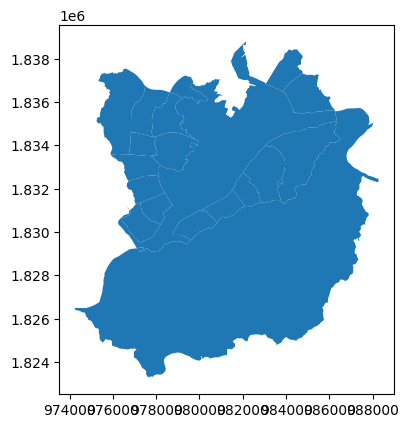

In [98]:
emd_shp.plot()

In [97]:
# merge
emd_rent = pd.merge(emd_shp, rent, left_on='EMD_KOR_NM', right_on='행정동', how='right').drop('EMD_KOR_NM', axis=1)
emd_rent

,EMD_CD,geometry,행정동,보증금,월세,보증금/전용,월세/전용
0,36110112,"POLYGON ((976632.216 1837529.692, 976690.14 18...",고운동,2039.552239,116.970149,26.695873,1.487372
1,36110340,"POLYGON ((987548.917 1832590.855, 987513.919 1...",금남면,5000.000000,310.000000,21.060418,1.290202
2,36110107,"POLYGON ((982022.18 1838464.595, 982022.209 18...",나성동,2327.294398,146.020262,35.946520,2.228512
3,36110109,"POLYGON ((978184.308 1833098.435, 978171.3 183...",다정동,3163.865546,194.537815,45.092323,2.728549
4,36110104,"POLYGON ((980061.157 1830998.691, 980061.379 1...",대평동,1838.888889,108.444444,25.572495,1.511952
5,36110114,"POLYGON ((977932.794 1834384.893, 977925.138 1...",도담동,2951.200000,170.800000,49.114039,2.667085
6,36110101,"MULTIPOLYGON (((983075.655 1834021.044, 983073...",반곡동,2566.666667,167.500000,46.899107,2.896076
7,36110103,"POLYGON ((980487.242 1831226.115, 980569.341 1...",보람동,2108.759124,124.799270,34.734173,2.092847
8,36110108,"POLYGON ((977093.293 1832458.424, 977238.054 1...",새롬동,2920.833333,184.300000,54.233870,3.309729
9,36110102,"POLYGON ((981984.019 1832705.817, 981988.084 1...",소담동,2433.346667,116.866667,38.779304,2.050197


In [99]:
# GEO 데이터프레임으로 변환
emd_rent = gpd.GeoDataFrame(emd_rent)
emd_rent.set_crs(epsg=5179, inplace=True)
emd_rent.to_crs(epsg=4326, inplace=True)

In [100]:
emd_rent.to_file('00data/세종시_임대료현황.geojson', driver='GeoJSON')

In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
# 공실률 비교
import pandas as pd


# 공실률 파일 불러오기
small_vacancy = pd.read_excel('00data/세종시_공실률_부동산원/상권별_소규모_상가_공실률.xlsx')
zip_vacancy = pd.read_excel('00data/세종시_공실률_부동산원/상권별_집합_상가_공실률.xlsx')
middle_vacancy = pd.read_excel('00data/세종시_공실률_부동산원/상권별_중대형_상가_공실률.xlsx')



c:\Users\Jaesik\miniconda3\envs\lenovo\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\Jaesik\miniconda3\envs\lenovo\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\Jaesik\miniconda3\envs\lenovo\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [6]:
# 각각 합치기

# type 컬럼 추가
small_vacancy['type'] = '소규모'
zip_vacancy['type'] = '집합'
middle_vacancy['type'] = '중대형'

bds1_vacancy = pd.concat([small_vacancy, zip_vacancy, middle_vacancy])
bds1_vacancy

,상권별(1),2022.1/4,2022.2/4,2022.3/4,2022.4/4,2023.1/4,2023.2/4,2023.3/4,2023.4/4,2024.1/4,2024.2/4,type
0,전국,6.4,6.6,6.8,6.9,6.9,6.9,7.3,7.3,7.6,8.0,소규모
1,서울,6.2,6.1,6.3,6.2,6.3,5.8,5.6,5.8,5.7,6.5,소규모
2,세종,12.2,13.1,10.9,10.9,14.4,15.7,15.0,11.7,11.3,11.3,소규모
0,전국,NaN,NaN,NaN,9.4,9.3,9.3,9.4,9.9,10.1,10.2,집합
1,서울,NaN,NaN,NaN,8.1,8.0,8.3,8.3,9.1,9.3,9.5,집합
2,세종,NaN,NaN,NaN,15.9,16.2,15.7,15.8,15.7,15.9,15.8,집합
0,전국,13.2,13.1,13.1,13.2,13.3,13.5,13.6,13.5,13.7,13.8,중대형
1,서울,9.5,9.5,9.1,9.1,8.6,8.4,8.8,8.4,8.4,8.5,중대형
2,세종,20.3,20.2,21.7,22.9,21.5,20.1,25.7,23.9,24.8,25.7,중대형


In [8]:
# type 세개를 합친 평균값 
bds1_mean = bds1_vacancy.drop('type', axis=1).groupby('상권별(1)').mean().reset_index()
bds1_mean

,상권별(1),2022.1/4,2022.2/4,2022.3/4,2022.4/4,2023.1/4,2023.2/4,2023.3/4,2023.4/4,2024.1/4,2024.2/4
0,서울,7.85,7.80,7.70,7.800000,7.633333,7.500000,7.566667,7.766667,7.800000,8.166667
1,세종,16.25,16.65,16.30,16.566667,17.366667,17.166667,18.833333,17.100000,17.333333,17.600000
2,전국,9.80,9.85,9.95,9.833333,9.833333,9.900000,10.100000,10.233333,10.466667,10.666667


In [ ]:
# type 별로 시각화
import seaborn as sns
import matplotlib.pyplot as plt

